In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("gap.tsv", sep='\t')
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


# Exercise 1
Below, I go through all the unique years and each country. With each pair from these two lists, I calculate the average life expectancy for that country in the given year, and then plot the information in a scatterplot. This allows me to plot all the possible (year, life expectancy) combinations in the data.

Text(0.5, 0, 'Years')

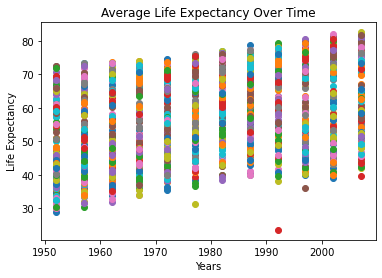

In [2]:
for year in data['year'].unique():
    for country in data['country'].unique():
        temp_df = data[(data['year'] == year) & (data['country'] == country)]
        mean_expect = temp_df.mean().lifeExp
        plt.scatter(year, mean_expect);
plt.title("Average Life Expectancy Over Time")
plt.ylabel("Life Expectancy")
plt.xlabel("Years")

# Question 1
There is a clear trend that Life Expectancy INCREASES across time. This trend also appears to be linear as the increase in life expectancy appears to be constant. Comparing the maximums of each year, there is clearly an steady increase throughout the years which proves this. Comparing the minimums, there is also an increase throughout the years, however it is not as steady or constant as with the maximums.

# Question 2
Below, I use the seaborn library to create a violin plot with the X-axis being Years and Y-axis being the Life Expectancy.

In the begining years from 1952-1962, the distribution of life expectancy across countries is skewed towards 40 years. They are not unimodal as there are 2 peaks where the data tends to congregate which are the life expectancies between 40 and 60-70 years with the former having the most data points. For these beginning years, the data does NOT appear to be symmetric about its center because the two peaks are roughly the same size, but the lower life expectancy peak has slightly more data points.

The middle years from 1967-1972, the plots are similar. The upper peak of 60-70 years of life expectancy is now becoming more prominent and it has as roughly as many data points at the lower peak. Thus, these years are symmetric about its center.

The latter years from 1977-2007, the distribution clearly becomes skewed. The majority of the data congregates around 70 years of life expectancy and the graphs are clearly unimodal there. Below 60 years, the graph becomes considerably less dense. Because of this sharp skew, these distributions are NOT symmetric.

Text(0.5, 1.0, 'Violin Plot of Average Life Expectancies Throughout Time')

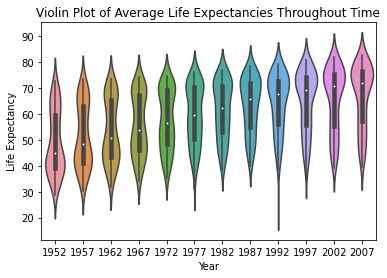

In [3]:
import seaborn as sns
sns.violinplot(x = 'year', y = 'lifeExp', data = data)
plt.ylabel("Life Expectancy")
plt.xlabel("Year")
plt.title("Violin Plot of Average Life Expectancies Throughout Time")

# Question 3
Yes, I would reject the null hypothesis of no relationship. From the visual inspection of the previous graphs, the life expectancy appears to increase throughout the years which directly contradicts the null hypothesis. This is evident because the In Exercise 1, both the minimum and maximum Life Expectancies increase over time. Also, in Question 2, the median life expectancy increases over time as well as the distribution skewing towards higher life expectancies over time.

# Question 4
In Question 3, we supposedly fit a linear regression line on the graph for life expectancy over time. The residuals would be the difference between that regression line and the actual data points of life expectancies. So, the violin plot of these residuals would display the distribution of these differences. The X-axis remains as Years, but the Y-axis would change to something along the lines of Differences In Life Expectancy. So, the Y-axis would scale from negatives to positives, depending on how large the differences are for each data point from the regression line and whether the data point is greater than or less than the regression line. 

So, as X increases, the year increases. As Y increases or decreases, the residual is more significant. A large y value regardless of positive/negative indicates a large difference between the real data point and the regression line. Whereas a small y value around 0 means there's a small difference, so the real data point and regression line are similar in value.

The wideness of the violins would depend on how many countries have similar differences for a given year. So, if the majority of countries had a similar life expectancy for a given year, they would also have similar residuals for that year. Thus, the violin plot of residuals would be wide around that difference because the majority of data points would fall into that range. 

The height of the violin depends on the maximum and minimum of the life expectancies. If there are outliers or a wide range of residuals, then the violins would be tall. Otherwise, it would be shorter.


# Question 5
From previous graphs, I concluded the both the life expectancy and regression line increases throughout time. 

Depending on the rate of change for both factors, I would expect the residuals to mostly be within a (-20, 20) range. This is because the distances from the median to the extremes is roughly within that range. I came to this conclusion using the box plots within each violin plot and the interquartile range expands roughly 20 years.

The wideness of the violin plots should be the same as in Question 2. This is because the X-axis doesn't face any changes and the Y-axis will still be based off the life expectancies, except the regression line value will be subtracted for each year. As a result, there shouldn't be a change to the wideness of the violin plots as the values are the same, relative to each other. 

# Exercise 2
Using LinearRegression, I made X and Y arrays using the Year and lifeExp columns from the data. Then, I fit the LinearRegression function with the data to allow predictions. First, I plotted (X,Y) which should be the same graph as Exercise 1 because its a plot of Life Expectancy throughout Years for each country. Next, I plotted the regression line, using the LinearRegression's predict() function for each year.

Text(0.5, 1.0, 'Average Life Expectancy Throughout Time')

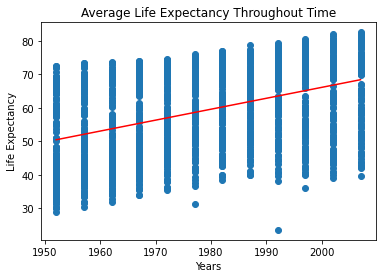

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
#sns.regplot(x='year', y='lifeExp', data = data)

X = data['year']
Y = data['lifeExp']
X = np.array(X).reshape(-1,1)
Y = np.array(Y)

reg = LinearRegression()
reg.fit(X,Y)
plt.scatter(X,Y)
plt.plot(X, reg.predict(X), color = "red")

plt.ylabel("Life Expectancy")
plt.xlabel("Years")
plt.title("Average Life Expectancy Throughout Time")

# Question 6
To find the p values, I imported statsmodels.formula.api and used the ols function with the lifeExp and year. As a result, I received the coefficients to be -585.6522 for the intercept and 0.3259 for the year. So, the regression line's formula is y = 0.3259x -585.6522. Thus, I can tell that life expectancy increases by 0.3259 each year.

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = smf.ols(formula="lifeExp ~ year", data=data).fit()
exer2Results = results

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           7.55e-80
Time:                        21:14:09   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -585.6522     32.314    -18.124      0.000    -649.031    -522.273
year           0.3259      0.016     19.965      0.000       0.294       0.358
==============================================================================
Omnibus:                      386.124   Durbin-Watson:                   0.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.750
Skew:                          -0.268   Prob(JB):                     1.97e-20
Kurtosis:                       2.004   Cond. No.                     2.27e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Question 7
Yes, I reject the null hypothesis of no relationship. This is because the P value for year is 0.00. Since this number is < 0.05, this p value is statistically significant which allows me to reject the null hypothesis. 

# Exercise 3
To create the violin plot of residuals vs year, I first had to get all the residuals. Using the statsmodel results from earlier, I used the .resid to obtain the residuals. Finally, I create a dataframe with this data and call seaborn's violinplot function on it.

Text(0.5, 1.0, 'Residual Throughout Time')

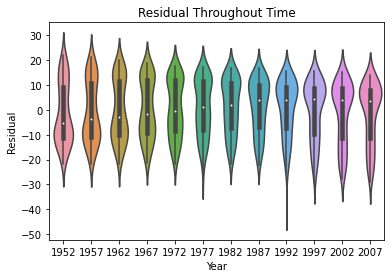

In [6]:
# Create a dataframe with the residual data
residual_dict = dict(Year = data['year'].values, Residual = results.resid) 
residual_df = pd.DataFrame(residual_dict)

# Plot the dataframe with a violinplot
sns.violinplot(x = 'Year', y = 'Residual', data = residual_df)
plt.title("Residual Throughout Time")

# Question 8
Yes, the violin plot matches my expectations in Question 4.  The X-axis is still Years and the Y-axis turns into Residuals which is the same as the difference between the predicted and actual values.

This plot also matches my response in Question 5. Most of the data is within the (-20,20) range and the height and wideness/peaks of the plots is similar to Question 1's violin plot.

# Exercise 4
According to Piazza @287, I should make a boxplot of residuals for each continent. To do so, I loop through all the continents and create a continent_df whose entries are all one continent. Then, I create a new regression using the statsmodel.ols function and I retrive the residuals from that function. Using the seaborn library, I finally create a boxplot of the residuals for the specific continent.

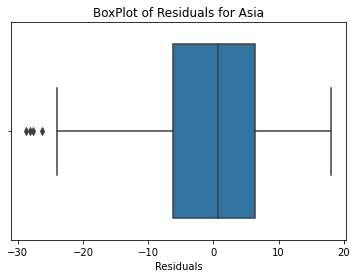

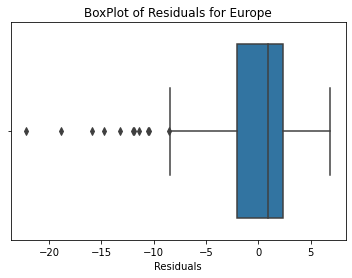

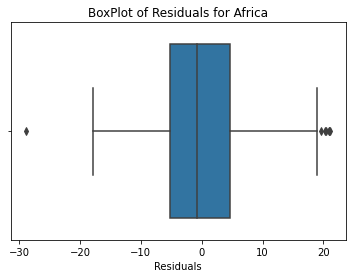

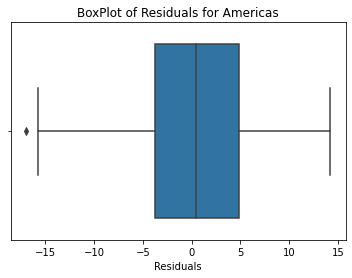

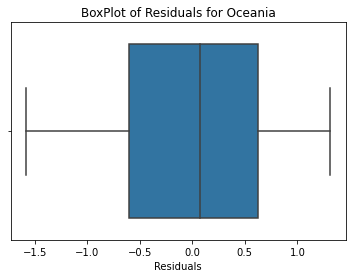

<Figure size 432x288 with 0 Axes>

In [7]:
# Loop through all continents
for continent in data['continent'].unique(): 
    continent_df = data[data['continent'] == continent]

    resid_results = smf.ols(formula="lifeExp ~ year", data=continent_df).fit()
    residuals = resid_results.resid

    sns.boxplot(x = residuals) 
    plt.title("BoxPlot of Residuals for " + continent)
    plt.xlabel("Residuals")
    plt.figure()

# Question 9
Yes, there is a dependency since the residuals vary greatly depending on which continent. While the median residuals are almost 0, the interquartile ranges and their extremes vary among the different continents. For instance, Oceania has a residuals ranging from -2 to 2 and has no extremes. Meanwhile, Africa ranges from -30 to 20 and has multiple extremes. There is a wide discrepancy between the two continents.
As a result, this suggests there's a skew in the regression analysis. Since some continents have large residuals, this could potentially alter the global life expectancy across time. For example- Europe. This continent has residuals ranging from -25 to 10 with the majority of its residuals being negative. As a result, Europe would most likely bring the average global life expectancy down due to its negative residuals.
On the other hand, Oceania with its low residuals ranging from -2 to 2, would most likely keep the average global life expectancy the same.

# Exercise 5
To accomplish this scatterplot, first I looped through all the continents and plotted the relevant data. I calculate the mean life expectancy of the continent for all the years and plot that as a scatter plot. Afterwards, I use LinearRegression to create a regression line for the newly made plot. Since I'm looping through all the continents and doing this, the final result will have all the average life expectancies for a given year as well as a regression line throughout the years for each continent.

Text(0.5, 1.0, 'Continental Life Expectancy Throughout Time')

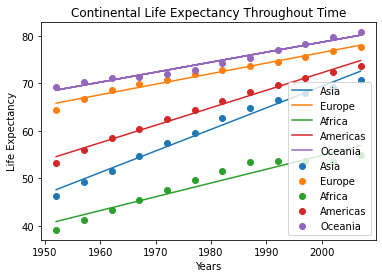

In [8]:
for continent in data['continent'].unique():
    # Creating the Scatter Plot for the current Continent
    continent_df = data[data['continent'] == continent]
    years = continent_df['year'].unique()
    values = []
    for year in years:
        year_df = continent_df[continent_df['year'] == year]
        values.append(year_df.mean().lifeExp)
    plt.scatter(years, values, label = continent)
    
    # Creating the Regression Line for the current Continent
    X = continent_df['year']
    Y = continent_df['lifeExp']
    X = np.array(X).reshape(-1,1)
    Y = np.array(Y)
    reg = LinearRegression()
    reg.fit(X,Y)
    plt.plot(X, reg.predict(X), label = continent)
    
    
plt.legend()
plt.ylabel("Life Expectancy")
plt.xlabel("Years")
plt.title("Continental Life Expectancy Throughout Time")

# Question 10
Yes. This is because both the continent and the year have an effect on the data. For a given continent, there are different life expectancies depending on the year. So, both continent and year must be accounted for in the interaction term. For example with Africa, the life expectancy increases throughout the year, so the year has to be incorporated in the interaction term to account for this.
As for the continents, different continents start at different life expectancies, such as Africa around 40 and Oceania around 70. So, there must be a Continent factor in the interaction term to account for this.

# Exercise 6
Using the statsmodel.formula.api to run ordinary least squares, I created a formula: lifeExp = year*continent. So, this makes the lifeExpectancy dependent on the year AND continent combination, instead of just dependent on solely the year or continent or an addition of both. I want specifically a multiplicative interaction.

In [9]:
results = smf.ols(formula="lifeExp ~ year * continent", data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:14:11   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -524.2578     32.963    -15.904      0.000    -588.911    -459.605
continent[T.Americas]       -138.8484     57.851     -2.400      0.016    -252.315     -25.382
continent[T.Asia]           -312.6330     52.904     -5.909      0.000    -416.396    -208.870
continent[T.Europe]          156.8469     54.498      2.878      0.004      49.957     263.737
continent[T.Oceania]         182.3499    171.283      1.065      0.287    -153.599     518.298
year                           0.2895      0.017     17.387      0.000       0.257       0.322
year:continent[T.Americas]     0.0781      0.029      2.673      0.008       0.021       0.135
year:continent[T.Asia]         0.1636      0.027      6.121      0.000       0.111       0.216
year:continent[T.Europe]      -0.0676      0.028     -2.455      0.014      -0.122      -0.014
year:continent[T.Oceania]     -0.0793      0.087     -0.916      0.360      -0.249       0.090
==============================================================================
Omnibus:                       27.121   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.106
Skew:                          -0.121   Prob(JB):                     2.65e-10
Kurtosis:                       3.750   Cond. No.                     2.09e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Question 11
Most parameters are significantly different from zero, in a statistical sense. For the Intercept terms, Americas, Asia, and Europe are significantly different because their P values are < 0.05. However, The continent of Oceania has a p value of 0.287 which is > 0.05, and therefore it is NOT significantly different from zero for the Intercept term.

Similarly for the Year term, the Continents Americas, Asia, and Europe are significantly different from zero because their P values are < 0.05. However, Oceania has a P value of 0.360 which is > 0.05 and therefore Oceania is NOT significantly different from zero for the Year term.

# Question 12
Using the Summary, the Intercept term's coefficient corresponds with where each continent has it's Y-intercept at x = 0. The Year term's coefficient corresponds with how much the year increases/decreases over time. 
In this case, we want to figure out how much life expectancy increases/decreases every year for a specific continent, so we focus on the Year terms' coefficients. 
For Americas, life expectancy increases by 0.0781 every year. For Asia, it increases by 0.1636. As for Europe and Oceania, they DECREASE by 0.0676 and 0.0793, respectively each year.

Below is code that displays the params (or CoEfficients) for both the Intercept and Year as well as specifically for each Continent. So, we will use the last 4 params to determine how much each continent increases or decreases their life expectancy in a year.

In [10]:
results.params

Intercept                    -524.257846
continent[T.Americas]        -138.848447
continent[T.Asia]            -312.633049
continent[T.Europe]           156.846852
continent[T.Oceania]          182.349883
year                            0.289529
year:continent[T.Americas]      0.078122
year:continent[T.Asia]          0.163593
year:continent[T.Europe]       -0.067597
year:continent[T.Oceania]      -0.079257
dtype: float64

# Exercise 7 and Question 13
Since the Year Only's F Value is 398.60 is less than the Year and Continent's F Value of 424.27, the Year and Continent is better than the Year Only. Proportionally to each other, the Year and Continent is 6% higher than the Year Only which is a significant upgrade.

In [11]:
results.fvalue
exer2Results.fvalue
print ("Year Only's F Value: ", exer2Results.fvalue, " vs Year/Continent's F Value: ", results.fvalue)

Year Only's F Value:  398.6047457117622  vs Year/Continent's F Value:  424.27290234006927


# Exercise 8
To create the plot, I first obtained the residuals from the Interaction Model using the .resid property. Then, I used seaborn to create the residualvs vs year plot.

This violin plot matches the linear regression assumptions well. All the violin plots are centered near 0, meaning most of the residuals are minimal and the actual values match very well with the predicted values.

Meanwhile, the Residuals vs fitted values graph (the same one from Exercise 3) appears to be less accurate as this new violin plot. Exercise 3's graph is not centered around 0 as well as Exercise 8's. The violins are taller, meaning high variance in residuals, and have multiple peaks which means the residuals are spread in clumps in different areas, none of which are centered around 0. Meanwhile, in Exercise 8, this graph has all the residuals clumped near 0 and the violins are not as tall. This means almost all the residuals have a magnitude of 0, so the data is much more concise and accurate in Exercise 8 than in Exercise 3.

Text(0.5, 1.0, 'Residual Throughout Time Using Interaction Model')

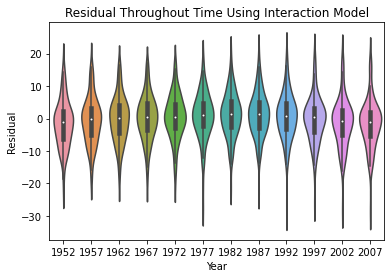

In [12]:
residuals = np.array(results.resid)
years = data['year'].values
sns.violinplot(years, residuals)

plt.ylabel("Residual")
plt.xlabel("Year")
plt.title("Residual Throughout Time Using Interaction Model")